In [25]:
import csv
time = []
Gaussian = []
Exponential = []
with open('ConvolveData.csv', newline='') as csvfile:
    has_header = csv.Sniffer().has_header(csvfile.read(1024)) # The file has a header of labels "Wavelength (nm)" and "Intensity"
    csvfile.seek(0)  # rewind to beginning of file
    incsv = csv.reader(csvfile) #read into memory
    if has_header:
        next(incsv)  # skip header row
    PascoSpectrum = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in PascoSpectrum:
        #print(row[0])
        time.append(float(row[0]))
        Gaussian.append(float(row[1]))
        Exponential.append(float(row[2]))
#        print(', '.join(row))

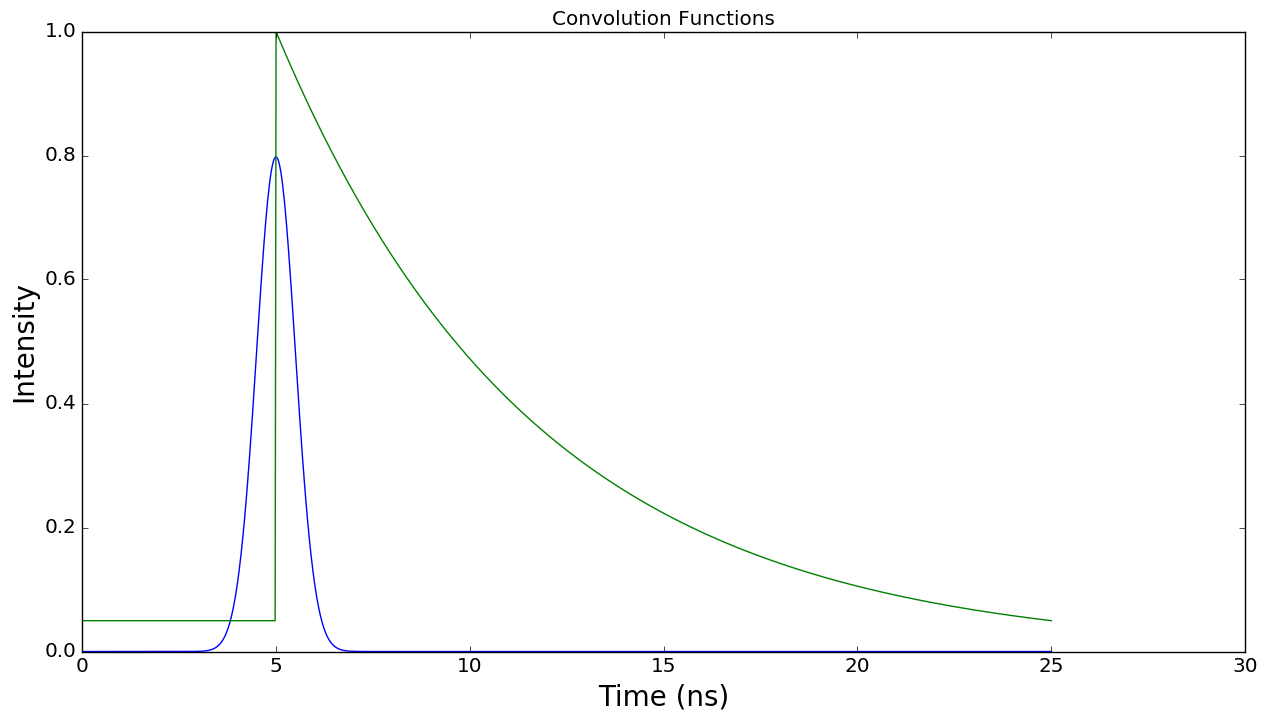

In [26]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 8),
         'axes.labelsize': '20',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.plot(time, Gaussian)
plt.plot(time, Exponential)
plt.title('Convolution Functions')
plt.xlabel('Time (ns)')
plt.ylabel('Intensity')
plt.show()

## Let's try the numpy convolution.

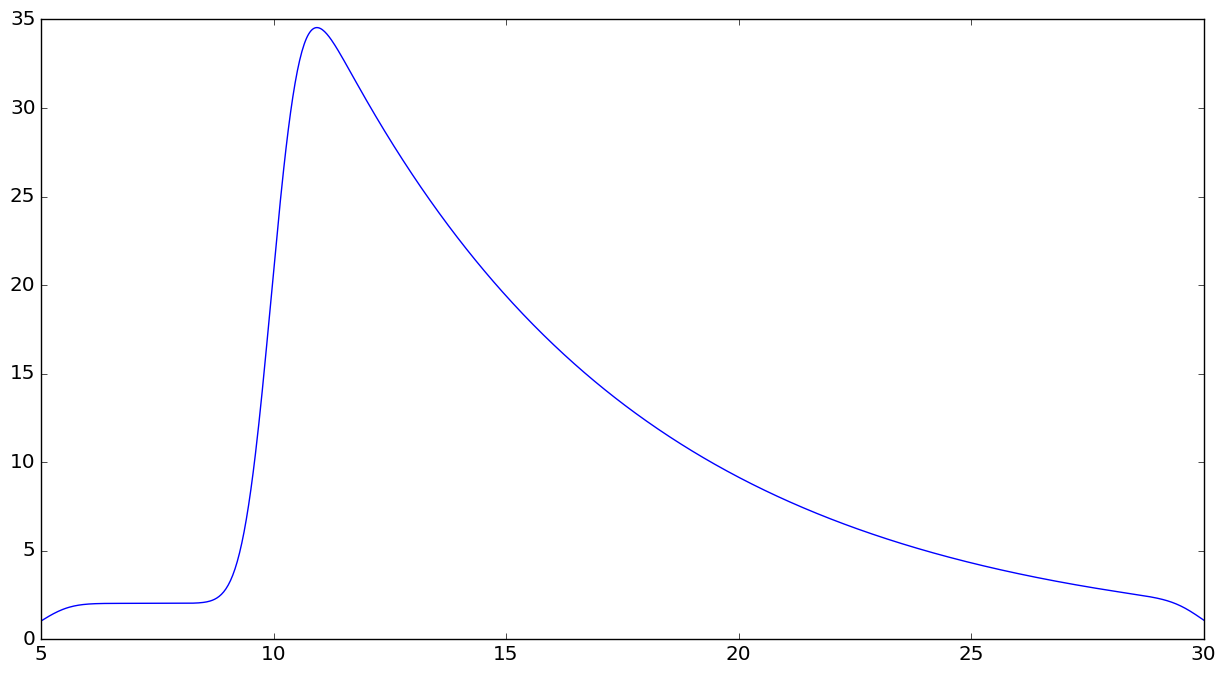

In [45]:
ConvolveFunc=np.convolve(Exponential, Gaussian, mode='full')
ConvolveFunc.shape
#print(ConvolveFunc)
convTime = np.arange(0,50,0.02439)
convTime.shape
plt.plot(convTime, ConvolveFunc)
plt.axis([5, 30, 0, 35]) #Why is the convolution shifting the result?
plt.show()

## And now let's try scipy.

In [54]:
from scipy import signal
scipyconv = signal.convolve(Exponential, Gaussian, mode='full')
scipyconv.shape


(2051,)

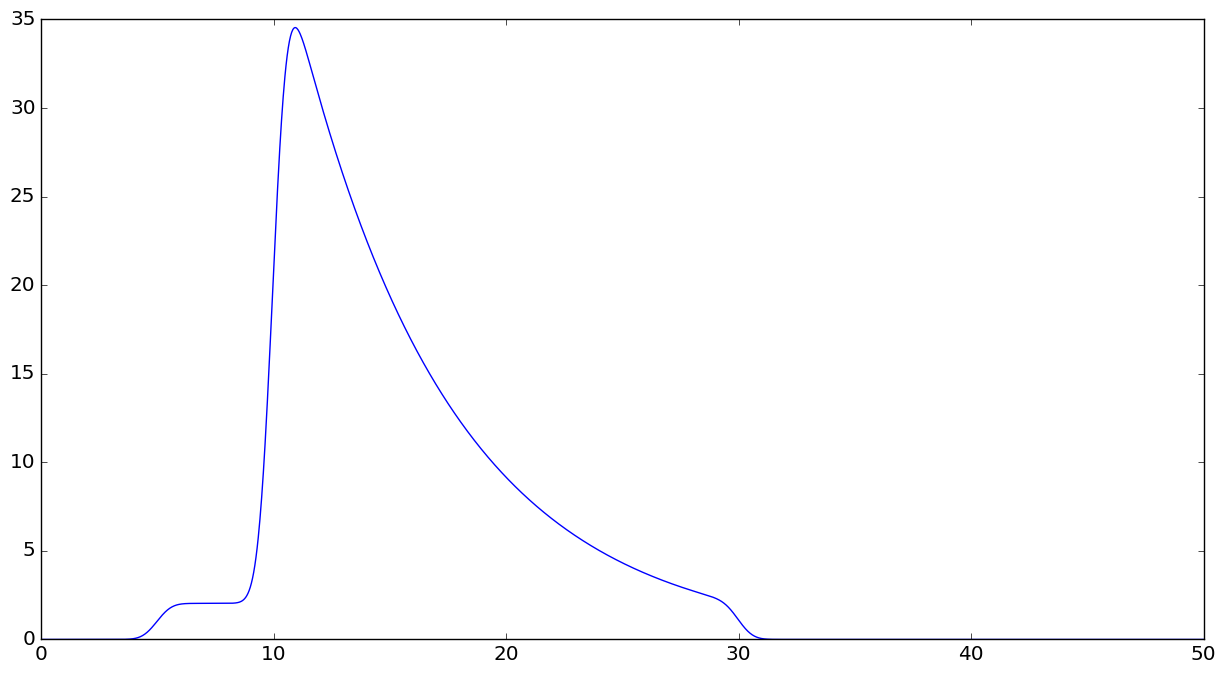

In [55]:
scipyconvtime = np.arange(0,25, 0.02439)
plt.plot(convTime, scipyconv)
#plt.axis([5, 30, 0, 35]) #Why is the convolution shifting the result?
plt.show()

They look the same. That's a bummer. It's going to be really difficult with arbitrarily shifted data to know where to cut.